In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from functools import partial

# Plot training and validation metrics
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 6s 23ms/step - loss: 1.8214 - accuracy: 0.2438 - val_loss: 1.8039 - val_accuracy: 0.2607
Epoch 2/50
256/256 [==============================] - 6s 22ms/step - loss: 1.7805 - accuracy: 0.2599 - val_loss: 1.7672 - val_accuracy: 0.2772
Epoch 3/50
256/256 [==============================] - 6s 22ms/step - loss: 1.7382 - accuracy: 0.2921 - val_loss: 1.7253 - val_accuracy: 0.3011
Epoch 4/50
256/256 [==============================] - 5s 21ms/step - loss: 1.7021 - accuracy: 0.3153 - val_loss: 1.7025 - val_accuracy: 0.3276
Epoch 5/50
256/256 [==============================] - 5s 21ms/step - loss: 1.6689 - accuracy: 0.3373 - val_loss: 1.6787 - val_accuracy: 0.3403
Epoch 6/50
256/256 [==============================] - 5s 21ms/step - loss: 1.6393 - accuracy: 0.3601 - val_loss: 1.6559 - val_accuracy: 0.3519
Epoch 7/50
256/256 [==============================] - 5s 20ms/step - loss: 1.6089 - accuracy: 0.365

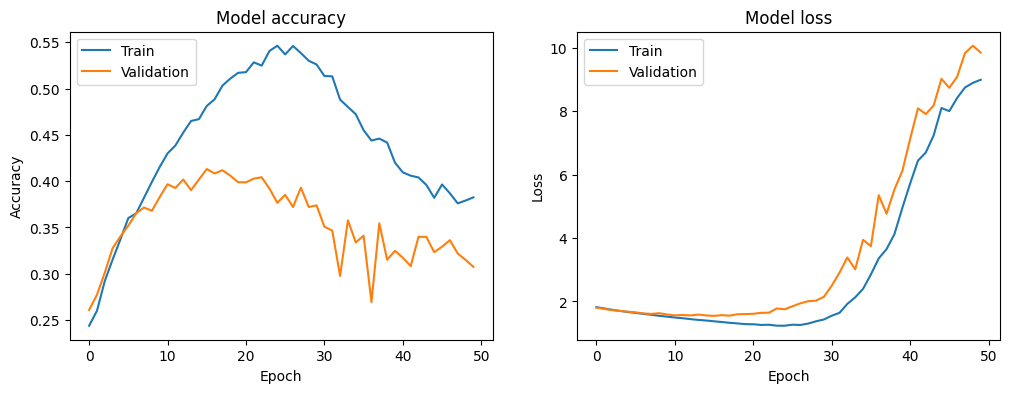

In [3]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='kullback_leibler_divergence', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_loss_kldiv_epoch50.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 6s 21ms/step - loss: 1.0729 - accuracy: 0.2507 - val_loss: 1.0725 - val_accuracy: 0.2462
Epoch 2/50
256/256 [==============================] - 5s 21ms/step - loss: 1.0710 - accuracy: 0.2516 - val_loss: 1.0725 - val_accuracy: 0.2462
Epoch 3/50
256/256 [==============================] - 5s 21ms/step - loss: 1.0710 - accuracy: 0.2516 - val_loss: 1.0725 - val_accuracy: 0.2462
Epoch 4/50
256/256 [==============================] - 5s 21ms/step - loss: 1.0710 - accuracy: 0.2516 - val_loss: 1.0725 - val_accuracy: 0.2462
Epoch 5/50
256/256 [==============================] - 5s 20ms/step - loss: 1.0709 - accuracy: 0.2516 - val_loss: 1.0725 - val_accuracy: 0.2462
Epoch 6/50
256/256 [==============================] - 5s 21ms/step - loss: 1.0709 - accuracy: 0.2521 - val_loss: 1.0725 - val_accuracy: 0.2461
Epoch 7/50
256/256 [==============================] - 5s 21ms/step - loss: 1.0709 - accuracy: 0.252

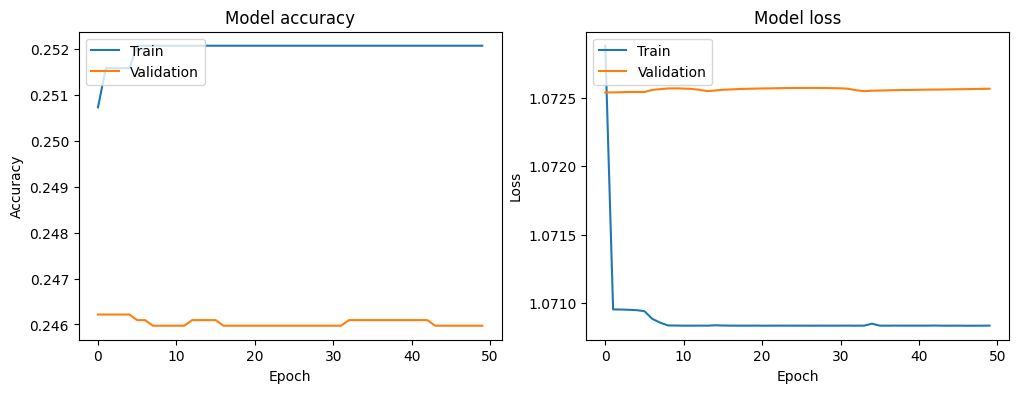

In [5]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='hinge', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_loss_hinge_epoch50.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 6s 22ms/step - loss: 1.2106 - accuracy: 0.2491 - val_loss: 1.2091 - val_accuracy: 0.2545
Epoch 2/50
256/256 [==============================] - 5s 21ms/step - loss: 1.2077 - accuracy: 0.2534 - val_loss: 1.2040 - val_accuracy: 0.2706
Epoch 3/50
256/256 [==============================] - 5s 21ms/step - loss: 1.2006 - accuracy: 0.2777 - val_loss: 1.1960 - val_accuracy: 0.2975
Epoch 4/50
256/256 [==============================] - 5s 21ms/step - loss: 1.1928 - accuracy: 0.2996 - val_loss: 1.1916 - val_accuracy: 0.3145
Epoch 5/50
256/256 [==============================] - 5s 21ms/step - loss: 1.1853 - accuracy: 0.3264 - val_loss: 1.1848 - val_accuracy: 0.3318
Epoch 6/50
256/256 [==============================] - 5s 21ms/step - loss: 1.1792 - accuracy: 0.3431 - val_loss: 1.1820 - val_accuracy: 0.3367
Epoch 7/50
256/256 [==============================] - 5s 21ms/step - loss: 1.1752 - accuracy: 0.353

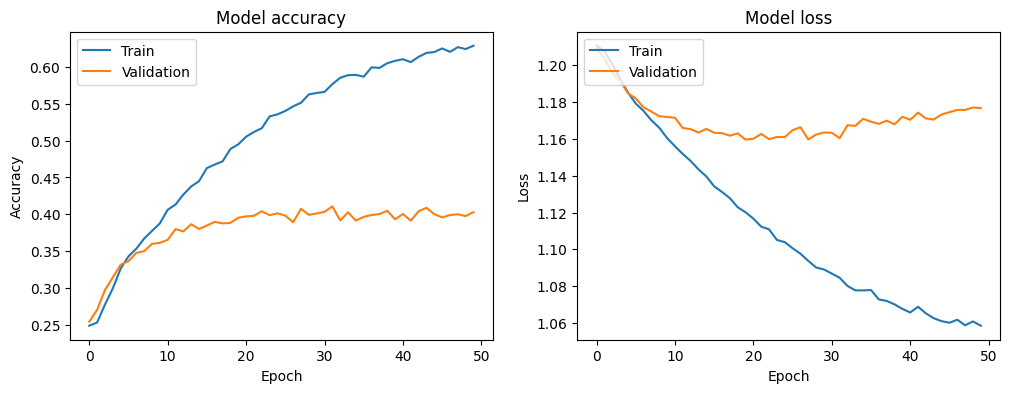

In [4]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='squared_hinge', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_loss_squared_hinge_epoch50.keras')

Found 28709 images belonging to 7 classes.
Epoch 1/50
256/256 [==============================] - 6s 22ms/step - loss: 0.0592 - accuracy: 0.2471 - val_loss: 0.0588 - val_accuracy: 0.2542
Epoch 2/50
256/256 [==============================] - 5s 20ms/step - loss: 0.0585 - accuracy: 0.2585 - val_loss: 0.0579 - val_accuracy: 0.2731
Epoch 3/50
256/256 [==============================] - 5s 20ms/step - loss: 0.0576 - accuracy: 0.2871 - val_loss: 0.0573 - val_accuracy: 0.2949
Epoch 4/50
256/256 [==============================] - 5s 20ms/step - loss: 0.0564 - accuracy: 0.3164 - val_loss: 0.0558 - val_accuracy: 0.3207
Epoch 5/50
256/256 [==============================] - 5s 20ms/step - loss: 0.0553 - accuracy: 0.3423 - val_loss: 0.0550 - val_accuracy: 0.3430
Epoch 6/50
256/256 [==============================] - 5s 20ms/step - loss: 0.0542 - accuracy: 0.3569 - val_loss: 0.0541 - val_accuracy: 0.3624
Epoch 7/50
256/256 [==============================] - 5s 20ms/step - loss: 0.0531 - accuracy: 0.381

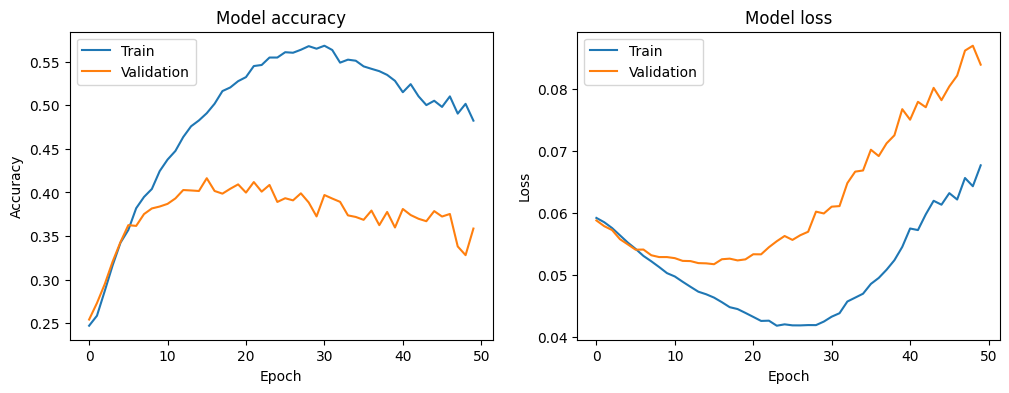

In [6]:
# Set your data directory
data_directory = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'  # Update this path to the directory containing your dataset

# Define constants
input_shape = (48, 48, 1)  # Updated input size to match your image size
num_classes = 7  # Automatically determine the number of classes
batch_size = 8192
epochs = 50

# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the [0, 1] range
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and preprocess the data
datagen_with_preprocessing = datagen.flow_from_directory(
    data_directory,
    target_size=(48, 48),  # Updated target size
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# Split the data into training and validation sets
X_train, y_train = datagen_with_preprocessing.next()
X_val, y_val = datagen_with_preprocessing.next()

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Ensure num_classes matches your dataset
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='huber_loss', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

plot_training_history(history)

# Save the model
model.save('fer_loss_huber_loss_epoch50.keras')